In [1]:
%matplotlib inline

This notebook is aimed at getting all the effector candidates from the Pst_104E_genome as defined as the following.
EffectorP prediction done by Jana Sperschneider
Gene expression cluster analysis done by Jana Sperschneider picking cluster 2, 3 and 8

In [2]:
import os
from Bio import SeqIO
import pandas as pd
import re
from pybedtools import BedTool
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#define your input folders
CLUSTER_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/Pst_104E_genome/gene_expression/Pst104_p_SecretomeClustering'
EFFECTORP_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/Pst_104E_genome/Secretomes/EffectorP'
GFF_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/032017_assembly'
PROTEIN_ANNO_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/enrichment_analysis/pa_26062017'
OUT_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/enrichment_analysis/lists'

In [4]:
genome = 'Pst_104E_v12_'
p_effector_list = []
h_effector_list = []

In [5]:
#define what you want to take
clusters = [ 2, 3, 8]
clusters_files = [os.path.join(CLUSTER_FOLDER, x) for x in os.listdir(CLUSTER_FOLDER)\
                 if x.startswith('Cluster') and x.endswith('_DEs.fasta') and int(x[7]) in clusters ]
effectorp_files = [os.path.join(EFFECTORP_FOLDER, x) for x in os.listdir(EFFECTORP_FOLDER)\
                  if x.endswith('effectors.fasta') and x.startswith(genome)]

In [6]:
#get all the sequence names into a list from the fasta headers 
for file in clusters_files:
    fh = open(file, 'r')
    for seq in SeqIO.parse(fh, 'fasta'):
        if 'hcontig' in seq.id:
            h_effector_list.append(seq.id)
        if 'pcontig' in seq.id:
            p_effector_list.append(seq.id)
    fh.close()

for file in effectorp_files:
    fh = open(file, 'r')
    for seq in SeqIO.parse(fh, 'fasta'):
        if 'hcontig' in seq.id:
            h_effector_list.append(seq.id)
        if 'pcontig' in seq.id:
            p_effector_list.append(seq.id)
    fh.close()

In [7]:
p_effector_file = os.path.join(OUT_FOLDER, genome + 'p_effector.list')
h_effector_file = os.path.join(OUT_FOLDER, genome + 'h_effector.list')

In [8]:
#write out the sets of effector candidates
fh = open(p_effector_file, 'w')
for ec in set(p_effector_list):
    print(ec, file=fh)
fh.close()
fh = open(h_effector_file, 'w')
for ec in set(h_effector_list):
    print(ec, file=fh)
fh.close()


In [9]:
#subset the gff files as well and write those out
p_gff_file = [os.path.join(GFF_FOLDER, x) for x in os.listdir(GFF_FOLDER)\
                 if x.startswith(genome+'p_ctg') and x.endswith('anno.gff3') ][0]
h_gff_file = [os.path.join(GFF_FOLDER, x) for x in os.listdir(GFF_FOLDER)\
                 if x.startswith(genome+'h_ctg') and x.endswith('anno.gff3') ][0]

In [10]:
os.listdir(GFF_FOLDER)

['Pst_104E_v12_p_ctg.anno.protein.fa',
 'Pst_104E_v12_ph_ctg.anno.CDS.fa',
 'pcontig_smaller_2000.txt',
 'Pst_104E_v12_h_ctg.anno.gff3',
 'Pst_104E_v12_ph_ctg.fa.fai',
 'Pst_104E_v12_h_ctg.fa.fai',
 'Pst_104E_v12_p_ctg.anno.gene.fa',
 'hcontig_greater_2000.txt',
 'Pst_104E_v12_h_ctg.genome_file',
 'Pst_104E_v12_h_ctg.anno.gene.fa',
 'Pst_104E_v12_p_ctg.genome_file',
 'Pst_104E_v12_h_ctg.anno.CDS.fa',
 'Pst_104E_v12_ph_ctg.anno.CDS.gff3',
 'pcontig_greater_2000.txt',
 'Pst_104E_v12_ph_ctg.anno.protein.fa',
 'Pst_104E_v12_p_ctg.fa',
 'Pst_104E_v12_p_ctg.anno.gff3',
 'Pst_104E_v12_ph_ctg.fa',
 'Pst_104E_v12_ph_ctg.REPET.gff',
 'Pst_104E_v12_h_ctg.anno.protein.fa',
 'README.txt',
 'Pst_104E_v12_h_ctg.fa',
 'Pst_104E_v12_p_ctg.anno.CDS.fa',
 'Pst_104E_v12_p_ctg.REPET.gff',
 'hcontig_smaller_2000.txt',
 'Pst_104E_v12_p_ctg.anno.CDS.gff3',
 'Pst_104E_v12_h_ctg.anno.CDS.gff3',
 'Pst_104E_v12_p_ctg.fa.fai',
 'Pst_104E_v12_h_ctg.REPET.gff',
 'Pst_104E_v12_ph_ctg.anno.gff3']

In [11]:
#get repeat gff files
p_repeat_gff_fn = [os.path.join(GFF_FOLDER, x) for x in os.listdir(GFF_FOLDER)\
                 if x.startswith(genome+'p_ctg') and x.endswith('REPET.gff') ][0]
h_repeat_gff_fn  = [os.path.join(GFF_FOLDER, x) for x in os.listdir(GFF_FOLDER)\
                 if x.startswith(genome+'h_ctg') and x.endswith('REPET.gff') ][0]

In the command line in /home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/TE_analysis the superfamily gff files were sorted as followed and copied over into the lists folder
sort Pst_104E_v12_h_ctg.REPET.superfamily.gff -k1,1n -k4,4n > Pst_104E_v12_h_ctg.REPET.sorted.superfamily.gff

In [12]:
#get repeat gff files
p_repeat_superfamily_gff_fn = [os.path.join(OUT_FOLDER, x) for x in os.listdir(OUT_FOLDER)\
                 if x.startswith(genome+'p_ctg') and x.endswith('REPET.sorted.superfamily.gff') ][0]
h_repeat_superfamily_gff_fn  = [os.path.join(OUT_FOLDER, x) for x in os.listdir(OUT_FOLDER)\
                 if x.startswith(genome+'h_ctg') and x.endswith('REPET.sorted.superfamily.gff') ][0]

In [13]:
#gff header 
gff_header = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

In [14]:
#now subset the gff files for effectors only
p_gff_df = pd.read_csv(p_gff_file, header = None, sep='\t', names= gff_header)
p_gff_df['ID'] = p_gff_df.attributes.str.extract(r'ID=([^;]*);', expand=False)
p_gff_df.sort_values(by=['seqid', 'start'], inplace = True)
h_gff_df = pd.read_csv(h_gff_file, header = None, sep='\t', names= gff_header)
h_gff_df['ID'] = h_gff_df.attributes.str.extract(r'ID=([^;]*);', expand=False)
h_gff_df.sort_values(by=['seqid', 'start'], inplace = True)

In [15]:
#now sort REPET gff and write out again
p_repeat_gff_df = pd.read_csv(p_repeat_gff_fn, header=None, sep='\t', names=gff_header, comment='#')
p_repeat_gff_fn = os.path.join(OUT_FOLDER,p_repeat_gff_fn.split('/')[-1] )
p_repeat_gff_df.sort_values(by=['seqid', 'start']).to_csv(p_repeat_gff_fn, header=None, index=None, sep='\t')
h_repeat_gff_df = pd.read_csv(h_repeat_gff_fn, header=None, sep='\t', names=gff_header, comment='#')
h_repeat_gff_fn = os.path.join(OUT_FOLDER,h_repeat_gff_fn.split('/')[-1] )
h_repeat_gff_df.sort_values(by=['seqid', 'start']).to_csv(h_repeat_gff_fn, header=None, index=None, sep='\t')

In [16]:
p_repeat_gff_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,pcontig_000,Pst79p_anno_REPET_TEs,match,4244.0,4312.0,0.0,+,.,ID=ms57116_pcontig_000_DXX-MITE_MCL772_Pst79_R...
1,pcontig_000,Pst79p_anno_REPET_TEs,match_part,4244.0,4312.0,0.0,+,.,ID=mp57116-1_pcontig_000_DXX-MITE_MCL772_Pst79...
2,pcontig_000,Pst79p_anno_REPET_TEs,match,10017.0,10551.0,0.0,-,.,ID=ms57143_pcontig_000_RLX-incomp_MCL1006_Pst7...
3,pcontig_000,Pst79p_anno_REPET_TEs,match_part,10017.0,10551.0,0.0,-,.,ID=mp57143-1_pcontig_000_RLX-incomp_MCL1006_Ps...
4,pcontig_000,Pst79p_anno_REPET_TEs,match,10552.0,10574.0,0.0,-,.,ID=ms57144_pcontig_000_RLX-incomp_MCL1006_Pst7...


In [17]:
os.path.join(OUT_FOLDER,p_repeat_gff_fn.split('/')[-1] )

'/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/enrichment_analysis/lists/Pst_104E_v12_p_ctg.REPET.gff'

In [18]:
p_gff_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes,ID
159778,pcontig_000,EVM,gene,767,3205,.,+,.,ID=evm.TU.pcontig_000.1;Name=gene_model_pconti...,evm.TU.pcontig_000.1
159779,pcontig_000,EVM,mRNA,767,3205,.,+,.,ID=evm.model.pcontig_000.1;Parent=evm.TU.pcont...,evm.model.pcontig_000.1
159780,pcontig_000,EVM,exon,767,1816,.,+,.,ID=evm.model.pcontig_000.1.exon1;Parent=evm.mo...,evm.model.pcontig_000.1.exon1
159786,pcontig_000,EVM,CDS,767,1816,.,+,0,ID=cds.evm.model.pcontig_000.1;Parent=evm.mode...,cds.evm.model.pcontig_000.1
159781,pcontig_000,EVM,exon,1923,2150,.,+,.,ID=evm.model.pcontig_000.1.exon2;Parent=evm.mo...,evm.model.pcontig_000.1.exon2


In [167]:
#now write out dataframes for p_gff

#bed 6 file
p_effector_bed_fn = p_effector_file.replace('.list', '.gene.bed')
p_gff_df[(p_gff_df.type == 'gene') & (p_gff_df.ID.str.replace('TU', 'model').isin(p_effector_list))].\
    loc[:,['seqid', 'start', 'end', 'ID', 'score', 'strand']].to_csv(p_effector_bed_fn, header=None, index=None, sep='\t')
    
p_effector_gff_fn = p_effector_file.replace('.list', '.gene.gff3')    
p_gff_df[(p_gff_df.type == 'gene') & (p_gff_df.ID.str.replace('TU', 'model').isin(p_effector_list))].\
    loc[:,gff_header].to_csv(p_effector_gff_fn, header=None, index=None, sep='\t')


#bed 6 file no effectors
p_noeffector_bed_fn = p_effector_file.replace('.list', 'p_noeffector.gene.bed')
p_gff_df[(p_gff_df.type == 'gene') & (~p_gff_df.ID.str.replace('TU', 'model').isin(p_effector_list))].\
    loc[:,['seqid', 'start', 'end', 'ID', 'score', 'strand']].to_csv(p_noeffector_bed_fn, header=None, index=None, sep='\t')

#no effector gff and list
p_noeffector_gff_fn = p_effector_file.replace('p_effector.list', 'p_noeffector.gene.gff3')    
p_gff_df[(p_gff_df.type == 'gene') & (~p_gff_df.ID.str.replace('TU', 'model').isin(p_effector_list))].\
    loc[:,gff_header].to_csv(p_noeffector_gff_fn, header=None, index=None, sep='\t')

file_name = p_effector_file.replace('p_effector.list', 'p_noeffector.list')
p_gff_df[(p_gff_df.type == 'gene') & (~p_gff_df.ID.str.replace('TU', 'model').isin(p_effector_list))]['ID'].str.replace('TU', 'model')\
    .to_csv(file_name, header=None, index=None, sep='\t')

In [20]:
#now write out dataframes for h_gff
h_effector_gff_fn = h_effector_file.replace('.list', '.gene.gff3')
h_gff_df[(h_gff_df.type == 'gene') & (h_gff_df.ID.str.replace('TU', 'model').isin(h_effector_list))].\
    loc[:,gff_header].to_csv(h_effector_gff_fn, header=None, index=None, sep='\t')
    
#no effector list
h_noeffector_gff_fn = h_effector_file.replace('h_effector.list', 'h_noeffector.gene.gff3')    
h_gff_df[(h_gff_df.type == 'gene') & (~h_gff_df.ID.str.replace('TU', 'model').isin(h_effector_list))].\
    loc[:,gff_header].to_csv(h_noeffector_gff_fn, header=None, index=None, sep='\t')
file_name = h_effector_file.replace('h_effector.list', 'h_noeffector.list')
h_gff_df[(h_gff_df.type == 'gene') & (~h_gff_df.ID.str.replace('TU', 'model').isin(h_effector_list))]['ID'].str.replace('TU', 'model')\
    .to_csv(file_name, header=None, index=None, sep='\t')

In [21]:
#now get BUSCO list and write out stuff
p_busco_file = [os.path.join(PROTEIN_ANNO_FOLDER, x) for x in os.listdir(PROTEIN_ANNO_FOLDER) if x.startswith(genome+'p_ctg') and 'busco' in x][0]
p_busco_list = pd.read_csv(p_busco_file, header=None, sep='\t')[0].tolist()
h_busco_file = [os.path.join(PROTEIN_ANNO_FOLDER, x) for x in os.listdir(PROTEIN_ANNO_FOLDER) if x.startswith(genome+'h_ctg') and 'busco' in x][0]
h_busco_list = pd.read_csv(h_busco_file, header=None, sep='\t')[0].tolist()

In [22]:
#write out BUSCO for pcontigs
file_name = p_effector_file.replace('effector.list', 'busco.list')
p_gff_df[(p_gff_df.type == 'gene') & (p_gff_df.ID.str.replace('TU', 'model').isin(p_busco_list))]['ID'].str.replace('TU', 'model')\
    .to_csv(file_name, header=None, index=None, sep='\t')
p_busco_gff_fn = p_effector_file.replace('effector.list', 'busco.gene.gff3')
p_gff_df[(p_gff_df.type == 'gene') & (p_gff_df.ID.str.replace('TU', 'model').isin(p_busco_list))].\
    loc[:,gff_header].to_csv(p_busco_gff_fn, header=None, index=None, sep='\t')

p_busco_bed_fn = p_effector_file.replace('effector.list', 'busco.gene.bed')
p_gff_df[(p_gff_df.type == 'gene') & (p_gff_df.ID.str.replace('TU', 'model').isin(p_busco_list))].\
    loc[:,['seqid', 'start', 'end', 'ID', 'score', 'strand']].to_csv(p_busco_bed_fn, header=None, index=None, sep='\t')

In [23]:
#write out BUSCO for hcontigs
file_name = h_effector_file.replace('effector.list', 'busco.list')
h_gff_df[(h_gff_df.type == 'gene') & (h_gff_df.ID.str.replace('TU', 'model').isin(h_busco_list))]['ID'].str.replace('TU', 'model')\
    .to_csv(file_name, header=None, index=None, sep='\t')
h_busco_gff_fn = h_effector_file.replace('effector.list', 'busco.gene.gff3')
h_gff_df[(h_gff_df.type == 'gene') & (h_gff_df.ID.str.replace('TU', 'model').isin(h_busco_list))].\
    loc[:,gff_header].to_csv(h_busco_gff_fn, header=None, index=None, sep='\t')

In [24]:
#write all genes
h_gene_gff_fn = h_effector_file.replace('effector.list', 'all.gene.gff3')
h_gff_df[(h_gff_df.type == 'gene') ].\
    loc[:,gff_header].to_csv(h_gene_gff_fn, header=None, index=None, sep='\t')
p_gene_gff_fn = p_effector_file.replace('effector.list', 'all.gene.gff3')
p_gff_df[(p_gff_df.type == 'gene') ].\
    loc[:,gff_header].to_csv(p_gene_gff_fn, header=None, index=None, sep='\t')
#write bed 6
p_gene_bed_fn = p_effector_file.replace('effector.list', 'all.gene.bed')
p_gff_df[(p_gff_df.type == 'gene') ].\
    loc[:,['seqid', 'start', 'end', 'ID', 'score', 'strand']].to_csv(p_gene_bed_fn, header=None, index=None, sep='\t')

In [25]:
!head {p_effector_bed_fn}

pcontig_000	8490	9492	evm.TU.pcontig_000.3	.	+
pcontig_000	28352	29795	evm.TU.pcontig_000.6	.	+
pcontig_000	34649	34940	evm.TU.pcontig_000.9	.	-
pcontig_000	49548	50911	evm.TU.pcontig_000.14	.	+
pcontig_000	66837	67400	evm.TU.pcontig_000.19	.	-
pcontig_000	227999	228495	evm.TU.pcontig_000.63	.	+
pcontig_000	338223	339410	evm.TU.pcontig_000.85	.	+
pcontig_000	439981	440863	evm.TU.pcontig_000.112	.	-
pcontig_000	686455	687551	evm.TU.pcontig_000.174	.	-
pcontig_000	718079	719522	evm.TU.pcontig_000.182	.	-


In [26]:
#get the distances
p_effector_bed = BedTool(p_effector_gff_fn)
p_noeffector_bed = BedTool(p_noeffector_gff_fn)
p_busco_bed = BedTool(p_busco_gff_fn)
p_repeats_bed = BedTool(p_repeat_superfamily_gff_fn)

p_closest_rep_to_eff = p_effector_bed.closest(p_repeats_bed, d=True)

p_closest_rep_to_eff_df = p_closest_rep_to_eff.to_dataframe()

tmp_REPET = pd.read_csv(p_repeat_superfamily_gff_fn, header=None, sep='\t', names=gff_header)
tmp_REPET['distance'] = tmp_REPET.end - tmp_REPET.start
tmp_fn = p_repeat_superfamily_gff_fn.replace('superfamily', 'tmpsuperfamily')
tmp_REPET[tmp_REPET.distance > 400].loc[:,gff_header].to_csv(tmp_fn, header=None, sep='\t', index=None)

p_repeats_bed = BedTool(tmp_fn)

/home/benjamin/anaconda3/lib/python3.5/site-packages/pybedtools/bedtool.py:3199: UserWarning: Default names for filetype gff are:
['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attributes']
but file has 19 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


In [27]:
#bed closest header
bed_repeat_closest_header = [x +'_gene' for x in gff_header] + [x +'_repeat' for x in gff_header] + ['distance']

In [28]:
import warnings
warnings.filterwarnings('ignore')

                 18
count   1574.000000
mean    2948.394536
std     4173.885557
min        0.000000
25%      358.250000
50%     1243.000000
75%     4062.500000
max    42804.000000


(0, 10000)

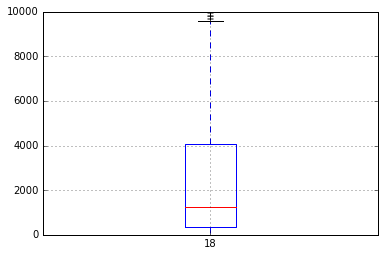

In [29]:
print(p_effector_bed.closest(p_repeats_bed,d=True,t='last').to_dataframe().iloc[:,18:20].describe())
p_effector_bed.closest(p_repeats_bed, d=True, t='last').to_dataframe().boxplot(column=18)
plt.ylim(0, 10000)

                 18
count   1444.000000
mean    2938.963989
std     4085.483570
min        0.000000
25%      452.500000
50%     1321.000000
75%     3907.250000
max    41225.000000


(0, 10000)

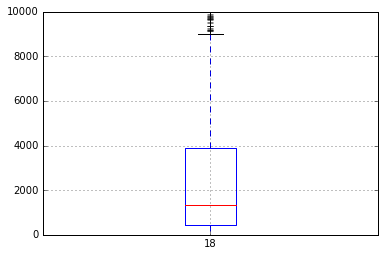

In [30]:
print(p_busco_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().iloc[:,18:20].describe())
p_busco_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().boxplot(column=18)
plt.ylim(0, 10000)

                 18
count  14296.000000
mean    2223.728316
std     3714.836857
min        0.000000
25%        0.000000
50%      740.000000
75%     2885.500000
max    55526.000000


(0, 10000)

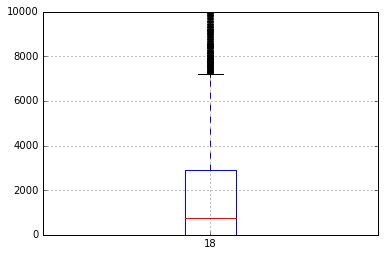

In [31]:
print(p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().iloc[:,18:20].describe())
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().boxplot(column=18)
plt.ylim(0, 10000)

In [32]:
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().groupby(17).count()[0].sort_values().tail(10)/len(p_noeffector_bed)*100

17
ClassII:MITE:?                3.539083
ClassI:LTR:?                  3.915285
ClassII:TIR:PIF-Harbinger     4.563188
ClassII:TIR:Tc1-Mariner       4.807022
ClassII:TIR:hAT               8.415773
ClassI:LARD:?                 8.764108
ClassI:LTR:Copia              9.342344
ClassII:TIR:?                 9.899680
ClassII:?:?                  12.644559
ClassI:LTR:Gypsy             18.266685
Name: 0, dtype: float64

In [33]:
p_effector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().groupby(17).count()[0].sort_values().tail(10)/len(p_effector_bed)*100

17
ClassII:TIR:PIF-Harbinger     3.240152
ClassII:TIR:Tc1-Mariner       3.621347
ClassI:LTR:?                  4.447268
ClassII:MITE:?                5.146125
ClassI:LTR:Copia              8.831004
ClassII:TIR:hAT               9.085133
ClassII:TIR:?                10.101652
ClassI:LARD:?                10.864041
ClassI:LTR:Gypsy             14.104193
ClassII:?:?                  17.217281
Name: 0, dtype: float64

In [34]:
p_busco_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().groupby(17).count()[0].sort_values().tail(10)/len(p_busco_bed)*100

17
ClassI:LTR:?                  4.362881
ClassII:TIR:PIF-Harbinger     4.432133
ClassII:TIR:Tc1-Mariner       5.401662
ClassII:MITE:?                5.747922
ClassI:LTR:Copia              7.963989
ClassII:TIR:hAT               8.518006
ClassI:LARD:?                10.526316
ClassII:TIR:?                12.119114
ClassI:LTR:Gypsy             13.573407
ClassII:?:?                  15.858726
Name: 0, dtype: float64

In [35]:
p_busco_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().groupby(17).mean()[18].sort_values().tail(10)

17
ClassII:TIR:hAT             3189.162393
ClassII:?:Sola              3290.000000
ClassI:LTR:Gypsy            3528.756906
ClassII:TIR:Tc1-Mariner     3675.421053
ClassII:Helitron:?          3765.230769
ClassI:LINE:Jockey          3832.500000
ClassII:TIR:MuDR            3947.156250
ClassII:Maverick:?          4384.285714
ClassI:LTR:ERV              7696.000000
ClassII:?:Academ           10287.000000
Name: 18, dtype: float64

In [36]:
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().groupby(17).mean()[18].sort_values().tail(10)

17
noCat                       2523.402899
ClassII:TIR:hAT             2570.000864
ClassII:TIR:MuDR            2596.115207
ClassII:TIR:?               2741.221992
ClassII:TIR:Tc1-Mariner     2775.314675
ClassII:Helitron:?          2827.692308
ClassI:LINE:Jockey          3003.733333
ClassII:MITE:?              3250.652273
ClassI:LTR:ERV             10918.400000
ClassII:T                           NaN
Name: 18, dtype: float64

In [37]:
p_effector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().groupby(17).mean()[18].sort_values().tail(10)

17
ClassI:LTR:Gypsy           3231.149038
ClassII:MITE:?             3260.383562
ClassII:TIR:?              3320.779874
ClassI:LTR:Copia           3353.064516
ClassII:TIR:hAT            3695.187050
noCat                      3752.581395
ClassI:TRIM:?              3884.500000
ClassII:TIR:Tc1-Mariner    3908.293103
ClassII:Helitron:?         3995.631579
ClassII:TIR:CACTA          6750.200000
Name: 18, dtype: float64

In [38]:
tmp_REPET[(tmp_REPET.distance > 400)&(tmp_REPET.attributes == 'ClassII:?:?')].loc[:,gff_header].to_csv(tmp_fn, header=None, sep='\t', index=None)

In [39]:
p_repeats_bed = BedTool(tmp_fn)

                  18
count    1478.000000
mean    17295.579838
std     18552.884167
min         6.000000
25%      4564.250000
50%     11582.000000
75%     24324.000000
max    194780.000000


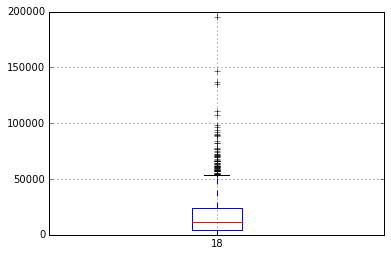

In [40]:
print(p_effector_bed.closest(p_repeats_bed,d=True,t='last', io=True).to_dataframe().iloc[:,18:20].describe())
p_effector_bed.closest(p_repeats_bed, d=True, t='last', io=True).to_dataframe().boxplot(column=18)

                  18
count    1296.000000
mean    17249.780093
std     19339.281875
min         2.000000
25%      4185.000000
50%     11023.000000
75%     23301.250000
max    156673.000000


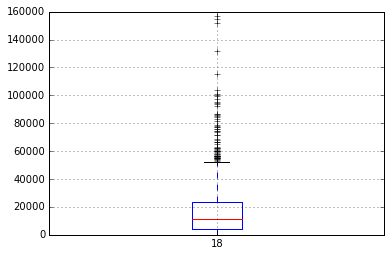

In [41]:
print(p_busco_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().iloc[:,18:20].describe())
p_busco_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().boxplot(column=18)

                  18
count    5302.000000
mean    15810.004715
std     17908.874295
min         2.000000
25%      4179.250000
50%     10144.500000
75%     21210.500000
max    187286.000000


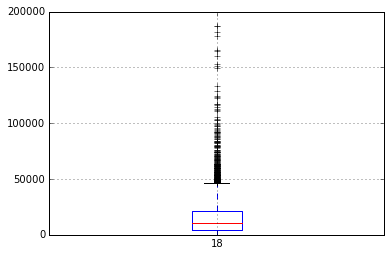

In [42]:
print(p_noeffector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().iloc[:,18:20].describe())
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().boxplot(column=18)

            18
count 14296.00
mean   2223.73
std    3714.84
min       0.00
25%       0.00
50%     740.00
75%    2885.50
max   55526.00


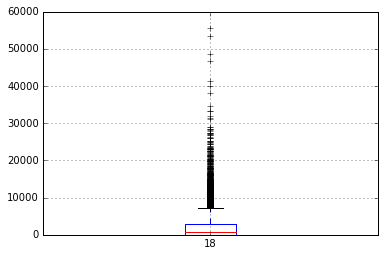

In [51]:
print(p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().iloc[:,18:20].describe())
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().boxplot(column=18)

[]

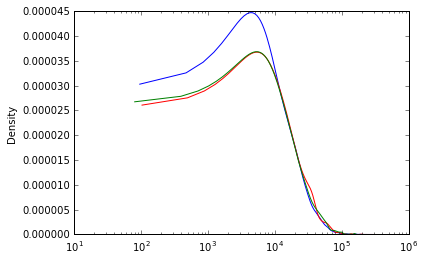

In [43]:
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().loc[:,18].plot(kind='density')
p_effector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().loc[:,18].plot(kind='density', color='r')
p_busco_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe().loc[:,18].plot(kind='density', color='g')
plt.semilogx()

[]

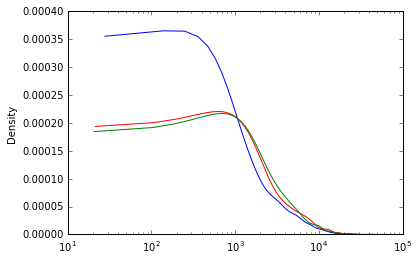

In [52]:
p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().loc[:,18].plot(kind='density')
p_effector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().loc[:,18].plot(kind='density', color='r')
p_busco_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe().loc[:,18].plot(kind='density', color='g')
plt.semilogx()

In [44]:
tmp_REPET = pd.read_csv(p_repeat_superfamily_gff_fn, header=None, sep='\t', names=gff_header)
tmp_REPET['distance'] = tmp_REPET.end - tmp_REPET.start
tmp_fn = p_repeat_superfamily_gff_fn.replace('superfamily', 'tmpsuperfamily')
tmp_REPET[tmp_REPET.distance > 400].loc[:,gff_header].to_csv(tmp_fn, header=None, sep='\t', index=None)

p_repeats_bed = BedTool(tmp_fn)

In [53]:
p_br_closest_df = p_busco_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe(names = bed_repeat_closest_header)

p_br_closest_pt = p_br_closest_df.pivot_table(values='distance', index=['attributes_repeat'] ,aggfunc=[ np.count_nonzero, np.mean]).T.unstack().T

p_br_closest_pt['superfamily_%'] = p_br_closest_pt.count_nonzero / p_br_closest_pt.count_nonzero.sum() *100
old_columns =[x for x in p_br_closest_pt.columns] 
new_columns = [x+'_busco' for x in p_br_closest_pt.columns]
p_br_closest_pt.rename(columns=dict(zip(old_columns,new_columns)), inplace = True)

p_er_closest_df = p_effector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe(names = bed_repeat_closest_header)

p_er_closest_pt = p_er_closest_df.pivot_table(values='distance', index=['attributes_repeat'] ,aggfunc=[ np.count_nonzero, np.mean]).T.unstack().T

p_er_closest_pt['superfamily_%'] = p_er_closest_pt.count_nonzero / p_er_closest_pt.count_nonzero.sum() *100
old_columns =[x for x in p_er_closest_pt.columns] 
new_columns = [x+'_effector' for x in p_er_closest_pt.columns]
p_er_closest_pt.rename(columns=dict(zip(old_columns,new_columns)), inplace = True)

p_ner_closest_df = p_noeffector_bed.closest(p_repeats_bed, d=True,t='last', io=True).to_dataframe(names = bed_repeat_closest_header)

p_ner_closest_pt = p_ner_closest_df.pivot_table(values='distance', index=['attributes_repeat'] ,aggfunc=[ np.count_nonzero, np.mean]).T.unstack().T

p_ner_closest_pt['superfamily_%'] = p_ner_closest_pt['count_nonzero'] / p_ner_closest_pt['count_nonzero'].sum() *100
old_columns =[x for x in p_ner_closest_pt.columns] 
new_columns = [x+'_noeffector' for x in p_ner_closest_pt.columns]
p_ner_closest_pt.rename(columns=dict(zip(old_columns,new_columns)), inplace = True)

pd.options.display.float_format = '{:.2f}'.format

repeat_distance_df = pd.concat([p_ner_closest_pt.iloc[:,1:], p_br_closest_pt.iloc[:,1:], p_er_closest_pt.iloc[:,1:]], axis=1)

repeat_distance_df[repeat_distance_df['superfamily_%_effector'] >1].sort_values('superfamily_%_effector')

,,mean_noeffector,superfamily_%_noeffector,mean_busco,superfamily_%_busco,mean_effector,superfamily_%_effector
attributes_repeat,,,,,,,
ClassII:Helitron:?,distance,3139.50,0.96,4449.82,0.76,3995.63,1.21
ClassII:TIR:CACTA,distance,3110.65,2.47,6555.92,0.90,6315.53,1.21
ClassI:DIRS:DIRS,distance,1695.24,1.25,2274.42,1.32,2698.60,1.59
ClassII:TIR:MuDR,distance,2911.69,3.19,4569.71,1.94,2969.60,2.73
noCat,distance,2699.79,2.64,2771.70,2.08,3834.91,2.73
ClassII:TIR:PIF-Harbinger,distance,1974.08,4.58,2674.48,4.43,2050.57,3.24
ClassII:TIR:Tc1-Mariner,distance,3067.33,4.82,3836.76,5.40,4464.65,3.62
ClassI:LTR:?,distance,2495.17,3.93,2769.40,4.36,2808.36,4.45
ClassII:MITE:?,distance,3133.07,3.55,2909.45,5.75,3257.52,5.15


In [54]:
#summary not allowing for overlaps of closest TEs not allowing for overlaps
p_br_closest_df = p_busco_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe(names = bed_repeat_closest_header)

p_br_closest_pt = p_br_closest_df.pivot_table(values='distance', index=['attributes_repeat'] ,aggfunc=[ np.count_nonzero, np.mean]).T.unstack().T

p_br_closest_pt['superfamily_%'] = p_br_closest_pt.count_nonzero / p_br_closest_pt.count_nonzero.sum() *100
old_columns =[x for x in p_br_closest_pt.columns] 
new_columns = [x+'_busco' for x in p_br_closest_pt.columns]
p_br_closest_pt.rename(columns=dict(zip(old_columns,new_columns)), inplace = True)

p_er_closest_df = p_effector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe(names = bed_repeat_closest_header)

p_er_closest_pt = p_er_closest_df.pivot_table(values='distance', index=['attributes_repeat'] ,aggfunc=[ np.count_nonzero, np.mean]).T.unstack().T

p_er_closest_pt['superfamily_%'] = p_er_closest_pt.count_nonzero / p_er_closest_pt.count_nonzero.sum() *100
old_columns =[x for x in p_er_closest_pt.columns] 
new_columns = [x+'_effector' for x in p_er_closest_pt.columns]
p_er_closest_pt.rename(columns=dict(zip(old_columns,new_columns)), inplace = True)

p_ner_closest_df = p_noeffector_bed.closest(p_repeats_bed, d=True,t='last').to_dataframe(names = bed_repeat_closest_header)

p_ner_closest_pt = p_ner_closest_df.pivot_table(values='distance', index=['attributes_repeat'] ,aggfunc=[ np.count_nonzero, np.mean]).T.unstack().T

p_ner_closest_pt['superfamily_%'] = p_ner_closest_pt['count_nonzero'] / p_ner_closest_pt['count_nonzero'].sum() *100
old_columns =[x for x in p_ner_closest_pt.columns] 
new_columns = [x+'_noeffector' for x in p_ner_closest_pt.columns]
p_ner_closest_pt.rename(columns=dict(zip(old_columns,new_columns)), inplace = True)

pd.options.display.float_format = '{:.2f}'.format

repeat_distance_df = pd.concat([p_ner_closest_pt.iloc[:,1:], p_br_closest_pt.iloc[:,1:], p_er_closest_pt.iloc[:,1:]], axis=1)

repeat_distance_df[repeat_distance_df['superfamily_%_effector'] >1].sort_values('superfamily_%_effector')

,,mean_noeffector,superfamily_%_noeffector,mean_busco,superfamily_%_busco,mean_effector,superfamily_%_effector
attributes_repeat,,,,,,,
ClassII:TIR:CACTA,distance,2307.51,1.88,2993.24,0.77,6750.20,1.19
ClassI:DIRS:DIRS,distance,1399.24,1.02,2160.70,1.47,2282.96,1.51
ClassII:Helitron:?,distance,2827.69,1.17,3765.23,0.85,3995.63,1.51
ClassII:TIR:MuDR,distance,2596.12,3.16,3947.16,2.09,3129.58,2.86
noCat,distance,2523.40,2.79,2868.71,2.17,3752.58,3.17
ClassII:TIR:PIF-Harbinger,distance,1467.07,4.27,2284.90,4.26,1511.71,3.25
ClassI:LTR:?,distance,2214.76,3.97,2485.55,4.57,1964.95,3.49
ClassII:TIR:Tc1-Mariner,distance,2775.31,5.01,3675.42,5.42,3908.29,3.81
ClassII:MITE:?,distance,3250.65,4.47,2998.27,5.96,3260.38,5.71


Add some sub_sets for randommization to get equal sized groups

In [295]:
#set the size of the subset here
sub_set = len(p_busco_bed)

In [296]:
p_effector_bed = BedTool(p_effector_bed_fn)
p_allgene_bed = BedTool(p_gene_bed_fn)
p_busco_bed = BedTool(p_busco_bed_fn)
p_allall_rand_sub = p_allgene_bed.random_subset(sub_set)
p_effector_bed_rand_sub = p_effector_bed.random_subset(sub_set)
p_busco_bed_rand_sub = p_busco_bed.random_subset(sub_set)

count     1421.00
mean     22950.54
std      34781.84
min        133.00
25%       3315.00
50%       9842.00
75%      28778.00
max     357617.00
Name: Effectors, dtype: float64


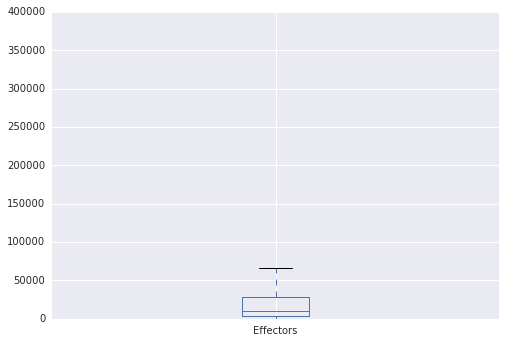

In [301]:
#get the distances with nearest gene effectors vs effectors
p_eself = p_effector_bed_rand_sub.closest(p_effector_bed_rand_sub, d=True,  N=True).to_dataframe().iloc[:,12]
p_eself = p_eself[p_eself > -1]
p_eself.name = 'Effectors'
p_eall = p_effector_bed_rand_sub.closest(p_allall_rand_sub, d=True,  N=True).to_dataframe().iloc[:,12]
p_eall= p_eall[p_eall > -1]
print(p_eself.describe())
p_eself.plot(kind='box')

count     1419.00
mean     28585.66
std      32527.25
min         38.00
25%       6063.00
50%      17636.00
75%      39236.50
max     240049.00
Name: All_genes, dtype: float64


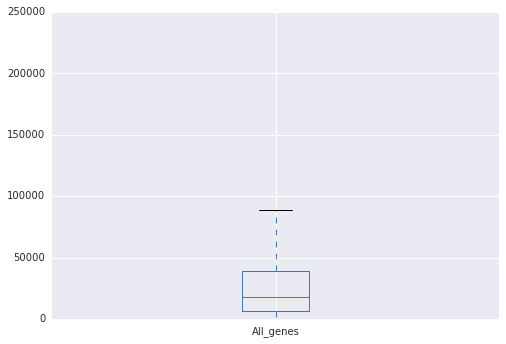

In [302]:
#get the distances with nearest gene all vs all subsampled
p_allall = p_allall_rand_sub.closest(p_allall_rand_sub, d=True, N=True).to_dataframe().iloc[:,12]
p_allall = p_allall[p_allall > -1]
p_allall.name = 'All_genes'
print(p_allall.describe())
p_allall.plot(kind='box')

count     1431.00
mean     24105.67
std      32325.42
min         44.00
25%       4692.00
50%      13565.00
75%      29552.00
max     318595.00
Name: BUSCO, dtype: float64


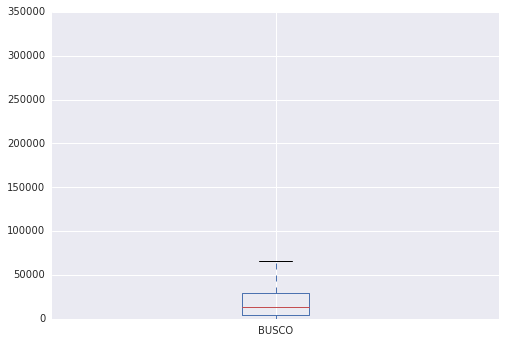

In [303]:
#now with buscos
p_bself = p_busco_bed_rand_sub.closest(p_busco_bed_rand_sub, d=True,  N=True).to_dataframe().iloc[:,12]
p_bself = p_bself[p_bself > -1]
p_bself.name = 'BUSCO'
print(p_bself.describe())
p_bself.plot(kind='box')

count     1425.00
mean     28395.32
std      31067.42
min         56.00
25%       6534.00
50%      17725.00
75%      40200.00
max     238936.00
Name: No_effectors, dtype: float64


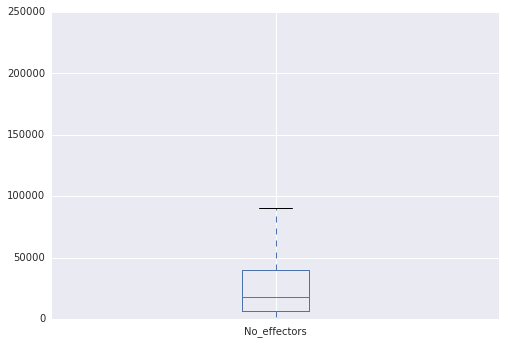

In [304]:
#non_effectors
p_noeffector_bed= BedTool(p_noeffector_bed_fn)
p_noeffector_rand_sub = p_noeffector_bed.random_subset(sub_set)
p_neself = p_noeffector_rand_sub.closest(p_noeffector_rand_sub, d=True,  N=True).to_dataframe().iloc[:,12]
p_neself = p_neself[p_neself > -1]
p_neself.name = 'No_effectors'
print(p_neself.describe())
p_neself.plot(kind='box')

In [61]:
import seaborn as sns

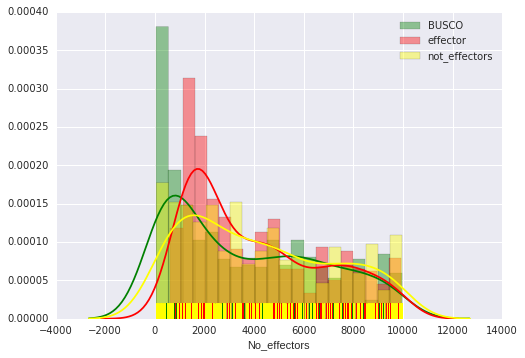

In [310]:
sns.distplot(p_bself[p_bself < 10000], bins=20, rug = True, color='g',label='BUSCO')
sns.distplot(p_eself[p_eself < 10000], bins=20, rug = True, color='red',label = 'effector')
sns.distplot(p_neself[p_neself <10000], bins=20, rug=True, color='yellow', label ='not_effectors')
plt.legend()

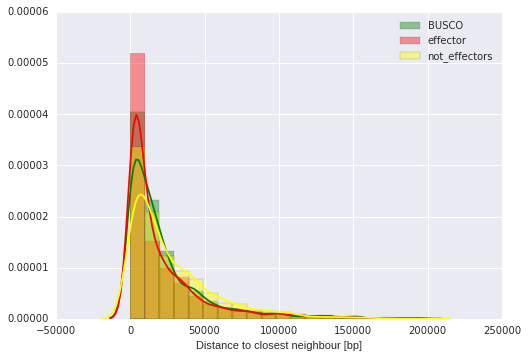

In [307]:
sns.distplot(p_bself[p_bself < 200000], bins=20, color='g' ,label='BUSCO')
sns.distplot(p_eself[p_eself < 200000], bins=20,  color='red',label = 'effector')
sns.distplot(p_neself[p_neself <200000], bins=20,  color='yellow', label ='not_effectors', axlabel='Distance to closest neighbour [bp]')
plt.legend()

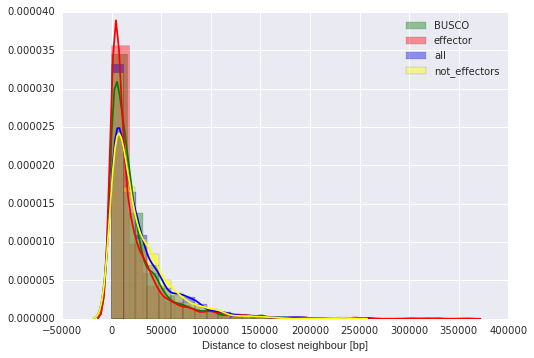

In [308]:
sns.distplot(p_bself, bins=20,color='g',  label='BUSCO')
sns.distplot(p_eself, bins=20,  color='red',label = 'effector')
sns.distplot(p_allall, bins=20,  color='b',label = 'all')
sns.distplot(p_neself, bins=20,  color='yellow', label ='not_effectors', axlabel='Distance to closest neighbour [bp]')
plt.legend()

In [311]:
#now make a nearest neightbour dataframe
nn_df = pd.concat([p_allall, p_bself, p_eself], names=['All_genes', 'BUSCO', 'effectors'], axis=1)

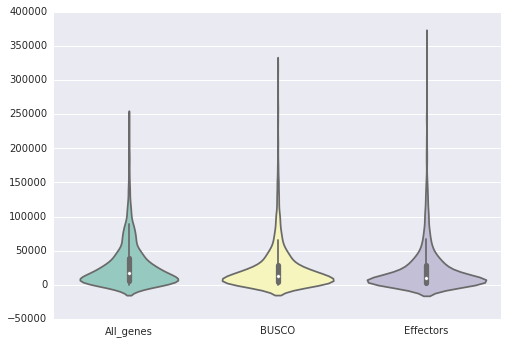

In [312]:
sns.violinplot(data=nn_df, palette="Set3")

In [314]:
#NOW FILTER BY QUANTIELS

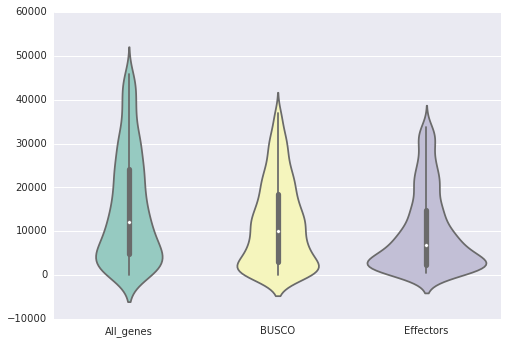

In [313]:
low = 0
high = 0.8
quant_df = nn_df.quantile([low,high])

qfilt_nn_df = nn_df.apply(lambda x: x[(x > quant_df.loc[low, x.name]) & (x  < quant_df.loc[high, x.name])], axis=0)

sns.violinplot(data=qfilt_nn_df , palette="Set3")

In [316]:
#now filter on IQR

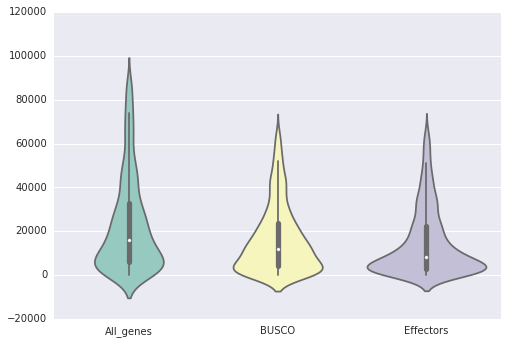

In [315]:
iqr_df_low = nn_df.apply(lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)) )
iqr_df_low.name ='low'
iqr_df_high = nn_df.apply(lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25)) )
iqr_df_high.name = 'high'

iqr_df = pd.concat([iqr_df_low, iqr_df_high], axis=1).T

iqr_nn_df = nn_df.apply(lambda x: x[(x > iqr_df.loc['low', x.name]) & (x  < iqr_df.loc['high', x.name])], axis=0)

sns.violinplot(data=iqr_nn_df  , palette="Set3")

911 982 784 809


(0, 20000)

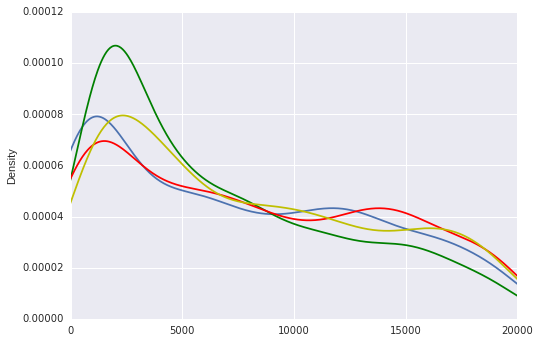

In [65]:
p_bself[p_bself < 20000].plot(kind='density')
p_eself[p_eself < 20000].plot(kind='density', color='g')
p_neself[p_neself < 20000].plot(kind='density', color='r')
p_eall[p_eall < 20000].plot(kind='density', color='y')
#plt.semilogx()
print(len(p_bself[p_bself < 20000]), len(p_eself[p_eself < 20000]), len(p_neself[p_neself < 20000]), len(p_eall[p_eall < 20000]))
plt.xlim(0, 20000)

(0, 0.0002)

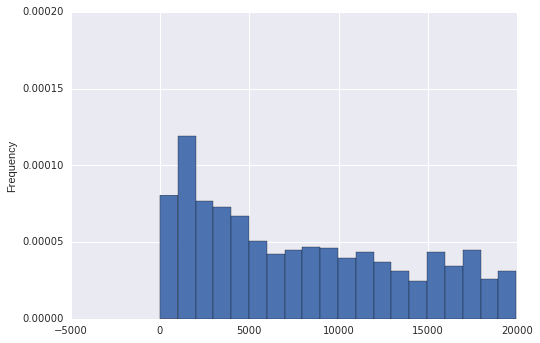

In [66]:
p_eall[p_eall < 20000].plot(kind='hist', bins=20, normed=True)
plt.ylim(0, 0.00020)

(0, 0.0002)

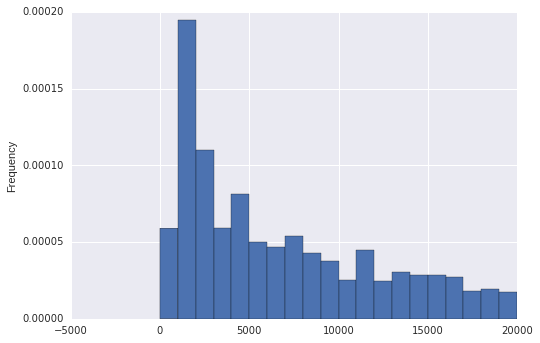

In [67]:
p_eself[p_eself < 20000].plot(kind='hist', bins=20, normed=True)
plt.ylim(0, 0.00020)

(0, 0.0002)

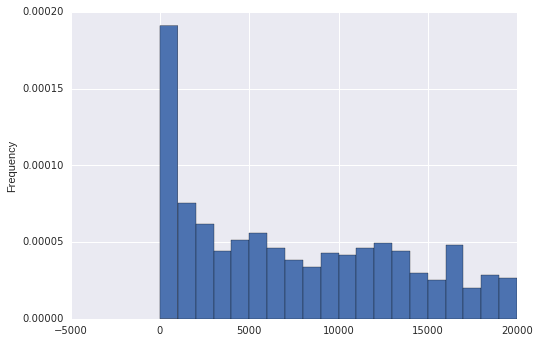

In [68]:
p_bself[p_bself < 20000].plot(kind='hist', bins=20,normed=True)
plt.ylim(0, 0.00020)

(0, 0.0002)

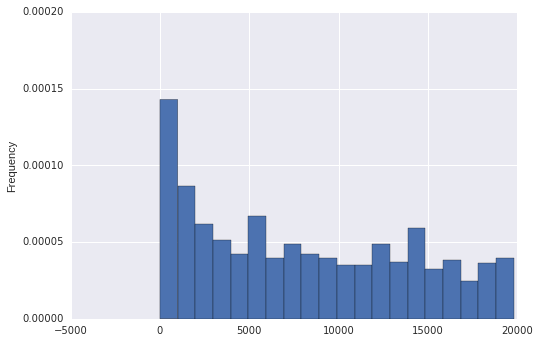

In [69]:
p_neself[p_neself < 20000].plot(kind='hist',bins=20,normed=True)
plt.ylim(0, 0.00020)

It seems like there seems to be no clear link between effector candidates and closest neighbour in terms of TEs in general. They all have the same distance in general.
Maybe Gypsy and ClassII:?:? should be looked at more carefully. Those are depleted and enriched in busco and effector genes. In general there seems to be a trend towards ClassII elements compared to ClassI in effector candidates.
This changes when for allowing for overlaps.

It seems that effectors are closer together than noneffector genes. Buscos also seem to cluster a bit. Let's see if we can visualize the location of genes on certain contigs vs repeats and such.

In [70]:
#start with getting effectors per contig divided by length divded by # of overall genes

In [71]:
effector_bdf = pd.read_csv(p_effector_bed_fn, header=None, sep='\t')

In [82]:
p_effectors_per_contig  = effector_bdf.groupby(0).count()[1]
p_effectors_per_contig.name = 'effectors'

In [81]:
p_all_genes_per_contig = pd.read_csv(p_gene_bed_fn, header=None, sep='\t').groupby(0).count()[1]
p_all_genes_per_contig.name = 'all_genes'
p_noeffectors_per_contig = pd.read_csv(p_noeffector_bed_fn, header=None, sep='\t').groupby(0).count()[1]
p_noeffectors_per_contig.name = 'no_effectors'
p_busco_per_contig = pd.read_csv(p_busco_bed_fn, header=None, sep='\t').groupby(0).count()[1]
p_busco_per_contig.name = 'buscos'

In [85]:
p_contig_length = pd.read_csv(os.path.join(GFF_FOLDER, 'Pst_104E_v12_p_ctg.genome_file'), header = None,\
                          names=['contig' , 'length'], sep='\t').sort_values('contig')

In [87]:
p_contig_length.index = p_contig_length.contig

In [89]:
p_contig_length = p_contig_length.loc[:, 'length']

In [94]:
gene_dis_per_contig = pd.concat([p_contig_length,p_all_genes_per_contig,p_noeffectors_per_contig,p_busco_per_contig,  p_effectors_per_contig, ], axis = 1)

In [93]:
from scipy.stats import chisquare

In [112]:
gene_dis_per_contig.fillna(value=0, inplace=True)

In [116]:
gene_dis_per_contig.effectors.sum()

1574.0

In [122]:
#chisquare for genes per contig vs bases per contig
chisquare(gene_dis_per_contig.length.values/gene_dis_per_contig.length.sum()\
          , gene_dis_per_contig.all_genes.values/gene_dis_per_contig.all_genes.sum())

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [125]:
chisquare(gene_dis_per_contig.buscos.values/gene_dis_per_contig.buscos.sum()\
          , gene_dis_per_contig.all_genes.values/gene_dis_per_contig.all_genes.sum())

Power_divergenceResult(statistic=nan, pvalue=nan)

In [136]:
gene_dis_per_contig['%busco'] = gene_dis_per_contig.buscos.values/gene_dis_per_contig.buscos.sum() *100
gene_dis_per_contig['%effector'] = gene_dis_per_contig.effectors.values/gene_dis_per_contig.effectors.sum() *100
gene_dis_per_contig['%all_genes'] = gene_dis_per_contig.all_genes.values/gene_dis_per_contig.all_genes.sum() *100
gene_dis_per_contig['%no_effector'] = gene_dis_per_contig.no_effectors.values/gene_dis_per_contig.no_effectors.sum() *100

In [133]:
chisquare(gene_dis_per_contig['%effector'], f_exp = gene_dis_per_contig['%all_genes'])

Power_divergenceResult(statistic=nan, pvalue=nan)

In [137]:
gene_dis_per_contig.loc[:,['%effector', '%all_genes','%no_effector' ,'%busco']]

,%effector,%all_genes,%no_effector,%busco
pcontig_000,2.73,3.66,3.76,3.67
pcontig_001,4.32,3.50,3.41,4.36
pcontig_002,3.37,3.07,3.04,2.49
pcontig_003,4.00,2.93,2.81,2.98
pcontig_004,2.48,2.33,2.31,2.22
pcontig_005,2.60,2.51,2.50,2.84
pcontig_006,2.22,2.70,2.75,3.32
pcontig_007,1.91,2.38,2.43,2.01
pcontig_008,1.14,1.95,2.04,1.80
pcontig_009,2.35,2.10,2.08,2.01


In [144]:
gene_dis_per_contig[(gene_dis_per_contig['%effector'] > gene_dis_per_contig['%all_genes']) &\
                    (gene_dis_per_contig['%effector'] > gene_dis_per_contig['%busco'])].loc[:,['effectors', '%effector', '%all_genes']].index

Index(['pcontig_002', 'pcontig_003', 'pcontig_004', 'pcontig_009',
       'pcontig_010', 'pcontig_018', 'pcontig_019', 'pcontig_021',
       'pcontig_026', 'pcontig_031', 'pcontig_034', 'pcontig_035',
       'pcontig_036', 'pcontig_039', 'pcontig_041', 'pcontig_044',
       'pcontig_045', 'pcontig_056', 'pcontig_057', 'pcontig_059',
       'pcontig_060', 'pcontig_062', 'pcontig_067', 'pcontig_073',
       'pcontig_078', 'pcontig_080', 'pcontig_081', 'pcontig_088',
       'pcontig_091', 'pcontig_092', 'pcontig_103', 'pcontig_148',
       'pcontig_149', 'pcontig_150', 'pcontig_157', 'pcontig_165',
       'pcontig_173', 'pcontig_186', 'pcontig_207', 'pcontig_235'],
      dtype='object')

In [158]:
#effectors per contig > than expected
gene_dis_per_contig[(gene_dis_per_contig['%effector'] / gene_dis_per_contig['%all_genes']) > 1.2].loc[:,['effectors', '%effector', 'all_genes','%all_genes']].index

Index(['pcontig_001', 'pcontig_003', 'pcontig_010', 'pcontig_018',
       'pcontig_023', 'pcontig_031', 'pcontig_035', 'pcontig_037',
       'pcontig_041', 'pcontig_044', 'pcontig_049', 'pcontig_054',
       'pcontig_056', 'pcontig_057', 'pcontig_059', 'pcontig_062',
       'pcontig_078', 'pcontig_081', 'pcontig_088', 'pcontig_091',
       'pcontig_092', 'pcontig_103', 'pcontig_148', 'pcontig_149',
       'pcontig_150', 'pcontig_157', 'pcontig_173', 'pcontig_181',
       'pcontig_186', 'pcontig_188', 'pcontig_189', 'pcontig_203',
       'pcontig_207', 'pcontig_233', 'pcontig_235'],
      dtype='object')

In [169]:
#sum off all effectors on enriched? contigs
gene_dis_per_contig[(gene_dis_per_contig['%effector'] > gene_dis_per_contig['%all_genes']) &\
                    (gene_dis_per_contig['%effector'] > gene_dis_per_contig['%busco'])].sum()

length         28995516.00
all_genes          5602.00
no_effectors       4892.00
buscos              458.00
effectors           710.00
%busco               31.72
%effector            45.11
%all_genes           35.17
%no_effector         34.08
dtype: float64

In [170]:
#sum off all effectors on enriched? contigs
gene_dis_per_contig[(gene_dis_per_contig['%effector'] > gene_dis_per_contig['%all_genes']) ].sum()

length         41504262.00
all_genes          8063.00
no_effectors       7066.00
buscos              751.00
effectors           997.00
%busco               52.01
%effector            63.34
%all_genes           50.62
%no_effector         49.23
dtype: float64

In [160]:
gene_dis_per_contig[(gene_dis_per_contig['%busco'] / gene_dis_per_contig['%all_genes'] > 1.2) & (gene_dis_per_contig['%busco'] > 0.5 )\
                    ].loc[:,['buscos', '%busco', '%all_genes']]

,buscos,%busco,%all_genes
pcontig_001,63.00,4.36,3.50
pcontig_006,48.00,3.32,2.70
pcontig_011,47.00,3.25,2.08
pcontig_022,32.00,2.22,1.70
pcontig_023,31.00,2.15,1.58
pcontig_030,26.00,1.80,1.43
pcontig_031,19.00,1.32,1.05
pcontig_037,25.00,1.73,1.18
pcontig_041,22.00,1.52,1.17
pcontig_042,21.00,1.45,1.10


In [168]:
gene_dis_per_contig[(gene_dis_per_contig['%busco'] / gene_dis_per_contig['%all_genes'] > 1.2) \
                    ].sum()

length         20730883.00
all_genes          4224.00
no_effectors       3776.00
buscos              527.00
effectors           448.00
%busco               36.50
%effector            28.46
%all_genes           26.52
%no_effector         26.31
dtype: float64

In [166]:
gene_dis_per_contig[(gene_dis_per_contig['%busco'] / gene_dis_per_contig['%all_genes'] > 1.1) & \
                   (gene_dis_per_contig['%effector'] / gene_dis_per_contig['%all_genes'] < 0.9) ].sum()

length         8439506.00
all_genes         1729.00
no_effectors      1608.00
buscos             207.00
effectors          121.00
%busco              14.34
%effector            7.69
%all_genes          10.86
%no_effector        11.20
dtype: float64

In [171]:
gene_dis_per_contig[(gene_dis_per_contig['%busco'] / gene_dis_per_contig['%all_genes'] > 1.0000001) & \
                   (gene_dis_per_contig['%effector'] / gene_dis_per_contig['%all_genes'] < 0.9999) ].sum()

length         18186406.00
all_genes          3601.00
no_effectors       3331.00
buscos              403.00
effectors           270.00
%busco               27.91
%effector            17.15
%all_genes           22.61
%no_effector         23.21
dtype: float64

In [317]:
#enriched for effectors relative to busco and all genes. Seems to be the case that their might be contigs
#with less BUSCOs and more effectors
gene_dis_per_contig[(gene_dis_per_contig['%busco'] / gene_dis_per_contig['%effector'] < 1) & \
                    (gene_dis_per_contig['%all_genes'] / gene_dis_per_contig['%effector'] < 1) ].sum()

length         28995516.00
all_genes          5602.00
no_effectors       4892.00
buscos              458.00
effectors           710.00
%busco               31.72
%effector            45.11
%all_genes           35.17
%no_effector         34.08
dtype: float64

Get closest features genes vs. TEs

In [319]:
tmp_REPET = pd.read_csv(p_repeat_superfamily_gff_fn, header=None, sep='\t', names=gff_header)
tmp_REPET['distance'] = tmp_REPET.end - tmp_REPET.start

tmp_fn = p_repeat_superfamily_gff_fn.replace('superfamily.gff', 'tmpsuperfamily.bed')
tmp_REPET[tmp_REPET.distance > 400].loc[:,['seqid', 'start', 'end', 'attributes', 'score', 'strand']].to_csv(tmp_fn, header=None, sep='\t', index=None)

p_repeats_bed = BedTool(tmp_fn)

In [320]:
tmp_df = p_effector_bed.closest( [p_repeats_bed.fn,p_allgene_bed.fn] , mdb='all', d=True, N=True).to_dataframe()

tmp_df.rename(columns={10: 'ID'}, inplace=True)

print('Per of effectors having genes as closest feature %f2' % (tmp_df[tmp_df.ID.str.contains('evm')][0].count()/len(p_effector_bed)*100))

print('Per of effectors having TE as closest %f2' % (tmp_df[~tmp_df.ID.str.contains('evm')][0].count()/len(p_effector_bed)*100))


Per of effectors having genes as closest feature 48.3481582
Per of effectors having TE as closest 63.9771282


In [321]:
tmp_df = p_allgene_bed.closest( [p_repeats_bed.fn,p_allgene_bed.fn] , mdb='all', d=True, N=True).to_dataframe()

tmp_df.rename(columns={10: 'ID'}, inplace=True)

print('Per of genes having genes as closest feature %f2' % (tmp_df[tmp_df.ID.str.contains('evm')][0].count()/len(p_allgene_bed)*100))

print('Per of genes having TE as closest %f2' % (tmp_df[~tmp_df.ID.str.contains('evm')][0].count()/len(p_allgene_bed)*100))

Per of genes having genes as closest feature 43.7970872
Per of genes having TE as closest 75.2574082


Get 5 and 3 prime distances of genes

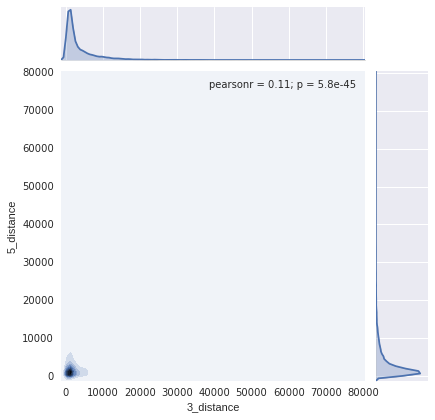

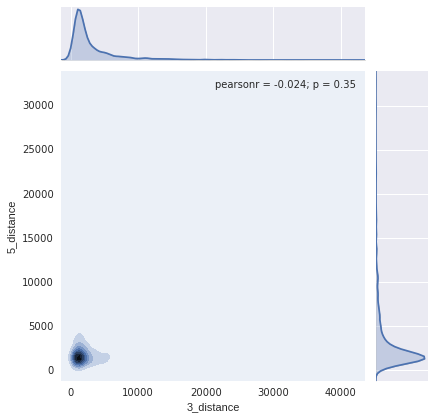

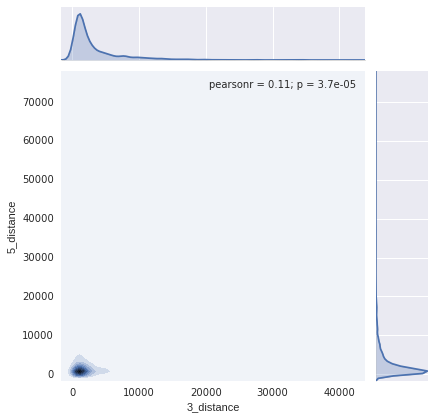

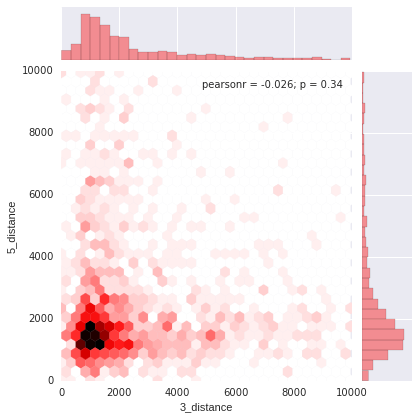

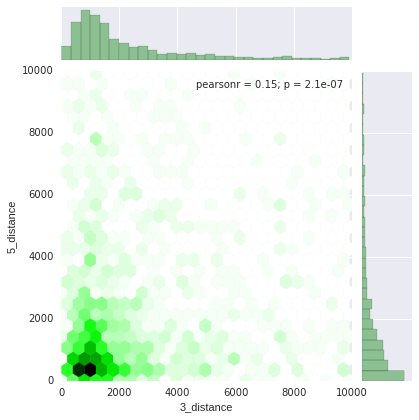

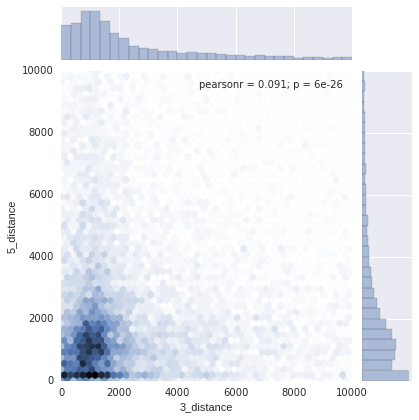

In [322]:
#now get the 3 prime distante to genes using the D='a' and iu flag in bedtools
g_to_g_3 = p_allgene_bed.closest( p_allgene_bed.fn ,  N=True, iu=True, D='a' ).to_dataframe().iloc[:,[3,12]]


g_to_g_3.rename(columns={12:'3_distance'}, inplace=True)

#now get the 5 prime distante to genes using the D='a' and id flag in bedtools
g_to_g_5 = p_allgene_bed.closest( p_allgene_bed.fn ,  N=True, id=True, D='a' ).to_dataframe().iloc[:,[3,12]]
g_to_g_5.rename(columns={12:'5_distance'}, inplace=True)

g_to_g_merged = g_to_g_3.merge(g_to_g_5)

#needs to be fixed to take boundaries into account. Filter out everythign that has a 5' distance of -1 meaning nothing
#and is at the begining of the contig .1 

g_to_g_merged = g_to_g_merged[~((g_to_g_merged['5_distance'] == -1) & g_to_g_merged[3].str.endswith('.1')) ]

#at the 3' end drop everything that has a negative distance meaning no 3' neighbour
g_to_g_merged=  g_to_g_merged[g_to_g_merged['3_distance'] > 1]

g_to_g_merged['5_distance'] = abs(g_to_g_merged['5_distance'])
g_to_g_merged['5_distance_log10'] = np.log10(g_to_g_merged['5_distance'])
g_to_g_merged['3_distance_log10'] = np.log10(g_to_g_merged['3_distance'])

sns.jointplot(x='3_distance', y='5_distance', data=g_to_g_merged, kind="kde")


#do the same for effectors
#now for effectors 
#getting 5' and 3' distance
e_to_g_3 = p_effector_bed.closest( p_allgene_bed.fn ,  N=True, iu=True, D='a' ).to_dataframe().iloc[:,[3,12]]
e_to_g_3.rename(columns={12:'3_distance'}, inplace=True)
e_to_g_5 = p_effector_bed.closest( p_allgene_bed.fn ,  N=True, id=True, D='a' ).to_dataframe().iloc[:,[3,12]]
e_to_g_5.rename(columns={12:'5_distance'}, inplace=True)

#merging them
e_to_g_merged = e_to_g_3.merge(g_to_g_5)

#needs to be fixed to take boundaries into account
#remove genes on the edges
e_to_g_merged = e_to_g_merged[~((e_to_g_merged['5_distance'] == -1) & e_to_g_merged[3].str.endswith('.1')) ]
e_to_g_merged=  e_to_g_merged[e_to_g_merged['3_distance'] > 1]
e_to_g_merged['5_distance'] = abs(e_to_g_merged['5_distance'])

sns.jointplot(x='3_distance', y='5_distance', data=e_to_g_merged, kind="kde")


#now for busco
b_to_g_3 = p_busco_bed.closest( p_allgene_bed.fn ,  N=True, iu=True, D='a' ).to_dataframe().iloc[:,[3,12]]
b_to_g_3.rename(columns={12:'3_distance'}, inplace=True)
b_to_g_5 = p_busco_bed.closest( p_allgene_bed.fn ,  N=True, id=True, D='a' ).to_dataframe().iloc[:,[3,12]]
b_to_g_5.rename(columns={12:'5_distance'}, inplace=True)
b_to_g_merged = b_to_g_3.merge(b_to_g_5)

#needs to be fixed to take boundaries into account
#remove genes on the edges see above for details
b_to_g_merged = b_to_g_merged[~((b_to_g_merged['5_distance'] == -1) & b_to_g_merged[3].str.endswith('.1')) ]
b_to_g_merged=  b_to_g_merged[b_to_g_merged['3_distance'] > 1]
b_to_g_merged['5_distance'] = abs(b_to_g_merged['5_distance'])
sns.jointplot(x='3_distance', y='5_distance', data=b_to_g_merged, kind="kde")

#now start plotting stuff
#sns.jointplot(x='3_distance', y='5_distance', data=e_to_g_merged, kind="kde", color='r', xlim=10000, ylim=10000)
#sns.jointplot(x='3_distance', y='5_distance', data=g_to_g_merged, kind="kde", xlim=10000, ylim=10000)


#subset everything by fixed numbers maybe to IQR or such in future
sns.jointplot(x='3_distance', y='5_distance', data=e_to_g_merged[(e_to_g_merged['5_distance'] < 10000) &\
        (e_to_g_merged['3_distance'] < 10000)], kind="hex", color='r',xlim=[0,10000], ylim=[0,10000],\
             marginal_kws=dict(bins=30))


sns.jointplot(x='3_distance', y='5_distance', data=b_to_g_merged[(b_to_g_merged['5_distance'] < 10000) &\
        (b_to_g_merged['3_distance'] < 10000)], kind="hex",color='g', xlim=[0,10000], ylim=[0,10000],\
              marginal_kws=dict(bins=30))

sns.jointplot(x='3_distance', y='5_distance', data=g_to_g_merged[(g_to_g_merged['5_distance'] < 10000) &\
        (g_to_g_merged['3_distance'] < 10000)], kind="hex", xlim=[0,10000], ylim=[0,10000],\
              marginal_kws=dict(bins=30))

Quick look at allele analysis

In [323]:
allele_QC_fn = os.path.join('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/allele_analysis/alleles'\
                           , 'Pst_104E_v12_p_ctg.h_contig_overlap.Qcov80.PctID70.alleles')

allele_blast_df_fn = os.path.join('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/allele_analysis' ,'Pst_104E_v12_p_ctg.Pst_104E_v12_h_ctg.0.001.blastp.outfmt6.allele_analysis')

alleles_df = pd.read_csv(allele_QC_fn, header=None, sep = '\t', names=['p_protein', 'h_protein'])
alleles_df['match'] = alleles_df.p_protein + alleles_df.h_protein

allele_blast_df = pd.read_csv(allele_blast_df_fn, sep='\t')
allele_blast_df['match'] = allele_blast_df.Query + allele_blast_df.Target

allele_blast_df = allele_blast_df[(allele_blast_df.match.isin(alleles_df.match))]

len(allele_blast_df)

allele_blast_df.head()

allele_blast_df[(allele_blast_df.Query.isin(p_effector_list))]['PctID'].mean()

allele_blast_df[~(allele_blast_df.Query.isin(p_effector_list))]['PctID'].mean()

print(len(allele_blast_df[(allele_blast_df.Query.isin(p_effector_list))])/len(p_effector_list))

print(len(allele_blast_df)/len(p_allgene_bed))

0.6106382978723405
0.6452159718734304
